# Predicting Bike Rentals

bIn this DataQuest project we will work with the data compiled by Hadi Fanaee-T at the University of Porto. It is available for downloading from [the University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

Here are the descriptions for the relevant columns:


|column|description|
|---|---|
|instant | A unique sequential ID number for each row|
|dteday | The date of the rentals|
|season | The season in which the rentals occurred|
|yr | The year the rentals occurred|
|mnth | The month the rentals occurred|
|hr | The hour the rentals occurred|
|holiday | Whether or not the day was a holiday|
|weekday | The day of the week (as a number, 0 to 7)|
|workingday | Whether or not the day was a working day|
|weathersit | The weather (as a categorical variable)|
|temp | The temperature, on a 0-1 scale|
|atemp | The adjusted temperature|
|hum | The humidity, on a 0-1 scale|
|windspeed | The wind speed, on a 0-1 scale|
|casual | The number of casual riders (people who hadn't previously signed up with the bike sharing program)|
|registered | The number of registered riders (people who had already signed up)|
|cnt | The total number of bike rentals (casual + registered)|


In this project, we'll try to predict the total number of bikes people rented in a given hour. We'll predict the `cnt` column using all of the other columns, except for `casual` and `registered`. To accomplish this, we'll create a few different machine learning models and evaluate their performance.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


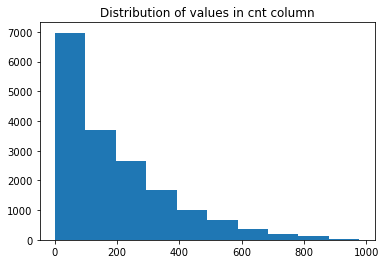

In [4]:
plt.hist(bike_rentals['cnt'])
plt.title('Distribution of values in cnt column')
plt.show()

The distribution of values in our target column in continuous, so we are predicting real values, not labels. This means we will need to use a regression algorithm, and not classification. The best recommended metric to measure the preformance of regressors are MSE or RMSE. We will use RMSE as it is easier to interpret.

## Feature Engineering

The `hr` column now shows time in 0-24 format. We will convert it into categories from morning(1), afternoon(2), evening(3) and night-time(4) to better represent the time perceived by humans (who rent bikes) and use the new column instead.

In [6]:
def assign_label(value):
    if value >= 6 and value < 12:
        return 1
    elif value >= 12 and value < 18:
        return 2
    elif value >= 18 and value < 24:
        return 3
    elif value >= 0 and value < 6:
        return 4

bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

Let us now choose other features that we will use to predict the amount of bike rentals in `cnt` column. First, we will exclude `casual` and `registered` columns, because `cnt` is their sum. We will also remove dtday column because we will not account for exact date in our predictions. 

In [10]:
bike_rentals_clean = bike_rentals.drop(['casual', 'registered', 'dteday', 'hr'], axis=1)

<AxesSubplot:>

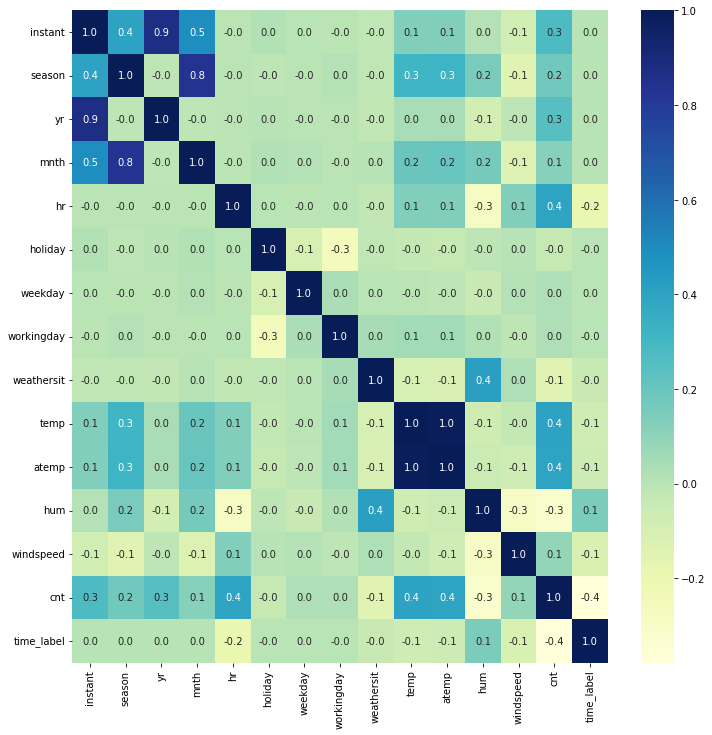

In [12]:
corrs = bike_rentals_clean.corr()
fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(corrs, cmap="YlGnBu",annot=True, fmt= ".1f", ax=ax)

We will use the rest of the columns as features for our model and proceed to randomize the dataset and allocate 80% of the dataset to training and 20% to testing.

In [14]:
features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label']
target = 'cnt'
train = bike_rentals.sample(frac=0.8, random_state=1)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

## Training and Testing
### Linear regression model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(train[features], train[target])
lr_predictions = lr.predict(test[features])
lr_rmse = np.sqrt(mean_squared_error(test[target], lr_predictions))
print("Linear regression error:", lr_rmse)

Linear regression error: 137.31302840011188


### Decision Tree Regressor model

In [18]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(train[features], train[target])
dt_predictions = dt.predict(test[features])
dt_rmse = np.sqrt(mean_squared_error(test[target], dt_predictions))
print("Decision Tree error: ", dt_rmse)

Decision Tree error:  142.39702763097196


### Random Forest Regressor model

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(train[features], train[target])
rf_predictions = rf.predict(test[features])
rf_rmse = np.sqrt(mean_squared_error(test[target], rf_predictions))
print("Random Forest error: ", rf_rmse)

Random Forest error:  108.88881593068075


Random Forest gave much better result than Linear Regression or Decision Tree. We will now tweak it's parameters to see if we can further improve the performance.